1.	Data Cleaning and Preparation
*   Load the dataset
*   Handling Missing Values
*   Correcting Data Types

In [1]:
#LOAD THE DATASET
import pandas as pd
from google.colab import files
uploaded = files.upload()



Saving Cardiotocographic.csv to Cardiotocographic.csv


In [2]:
#read the file
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)
display(data.head())

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
#Handling missing values
data.fillna(data.mean(), inplace=True)       #inserting the missing values with mean
print("\nMissing values after imputation:")  #check the missing values
print(data.isnull().sum())


Missing values after imputation:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [5]:
#Crrecting the Data Types
print(data.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [6]:
#Detecting  outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nNumber of outliers in each column:",outliers_condition.sum())
for column in data.columns:
    median = data[column].median()
    data[column] = data[column].mask(outliers_condition[column], median)
print("\nData after treating outliers:")
display(data.describe())


Number of outliers in each column: LB           10
AC           43
FM          347
UC           13
DL          125
DS          141
DP          305
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         580
dtype: int64

Data after treating outliers:


LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.267384     0.002940     0.000554     0.004341     0.001324   
std       9.743448     0.003495     0.001300     0.002911     0.002156   
min     106.000000    -0.000185    -0.003435    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.001880     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005081     0.000000     0.006504     0.002192   
max     160.000000     0.013861     0.006272     0.012987     0.008197   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.0  2126.0  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.0     0.0    46.993632     1.235030     2.640408     7.594481   
std       0.0     0.0    17.157976     0.685014     5.748781     4.438410   
min       0.0     0.0    11.799846     0.200000    -1.043619    -0.200788   
25%       0.0     0.0    32.000000     0.700000     0.000000     4.696705   
50%       0.0     0.0    49.000000     1.200000     0.000000     7.500000   
75%       0.0     0.0    61.000000     1.600000     1.000000    10.200000   
max       0.0     0.0    87.000000     3.200000    27.000000    20.040354   

             Width     Tendency     NSP  
count  2126.000000  2126.000000  2126.0  
mean     70.318724     0.319192     1.0  
std      38.615207     0.607102     0.0  
min       3.000000    -1.006614     1.0  
25%      37.000000     0.000000     1.0  
50%      68.000000     0.000000     1.0  
75%      99.000000     1.000000     1.0  
max     180.000000     1.023635     1.0

2.	Statistical Summary
     

In [7]:
#Statistical Description of the data
Stats=pd.DataFrame()
#Calculating mean, median, std, and IQR for each column
Stats['Mean'] = data.mean()
Stats['Median'] = data.median()
Stats['Standard Deviation'] = data.std()
Stats['IQR'] = data.quantile(0.75) - data.quantile(0.25)
print("\nStatistical Summary for Each Variable:")    #final result
display(Stats)


Statistical Summary for Each Variable:


Mean      Median  Standard Deviation        IQR
LB        133.267384  133.000000            9.743448  14.000000
AC          0.002940    0.001668            0.003495   0.005081
FM          0.000554    0.000000            0.001300   0.000000
UC          0.004341    0.004484            0.002911   0.004624
DL          0.001324    0.000000            0.002156   0.002192
DS          0.000000    0.000000            0.000000   0.000000
DP          0.000000    0.000000            0.000000   0.000000
ASTV       46.993632   49.000000           17.157976  29.000000
MSTV        1.235030    1.200000            0.685014   0.900000
ALTV        2.640408    0.000000            5.748781   1.000000
MLTV        7.594481    7.500000            4.438410   5.503295
Width      70.318724   68.000000           38.615207  62.000000
Tendency    0.319192    0.000000            0.607102   1.000000
NSP         1.000000    1.000000            0.000000   0.000000

**HIGHLIGHTS OF THE STATISTICAL SUMMARY**

**Mean versus Median:**
Close Values: If the mean and median are close, the distribution is probably symmetrical.
A large inconsistency between the mean and median indicates a skewed distribution. For example, if the mean is significantly higher than the median, the data may be right-skewed (large tail on right side).

**Standard deviation:**
High standard deviation indicates a big spread in the data, implying that the values are further off from the mean.
Low standard deviation indicates that the data points are tightly packed around the mean.

**The Interquartile Range (IQR):**
A big IQR shows that the middle 50% of the data is dispersed, which may imply variability in the  half of the data.
A tiny IQR means that the core data points are tightly packed.

**Potential outliers:**
If the IQR is little but the standard deviation is big, it might suggest the existence of outliers affecting the mean but not the median.




3.	Data Visualization:

●	 Boxplots to visualize the distributions of variables.

●	 Bar charts to display the categories for categorical variables.

●	 Scatter plots to visualize relationships between pairs of variables.

●	 Pair plots, or violin plots for deeper insights.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

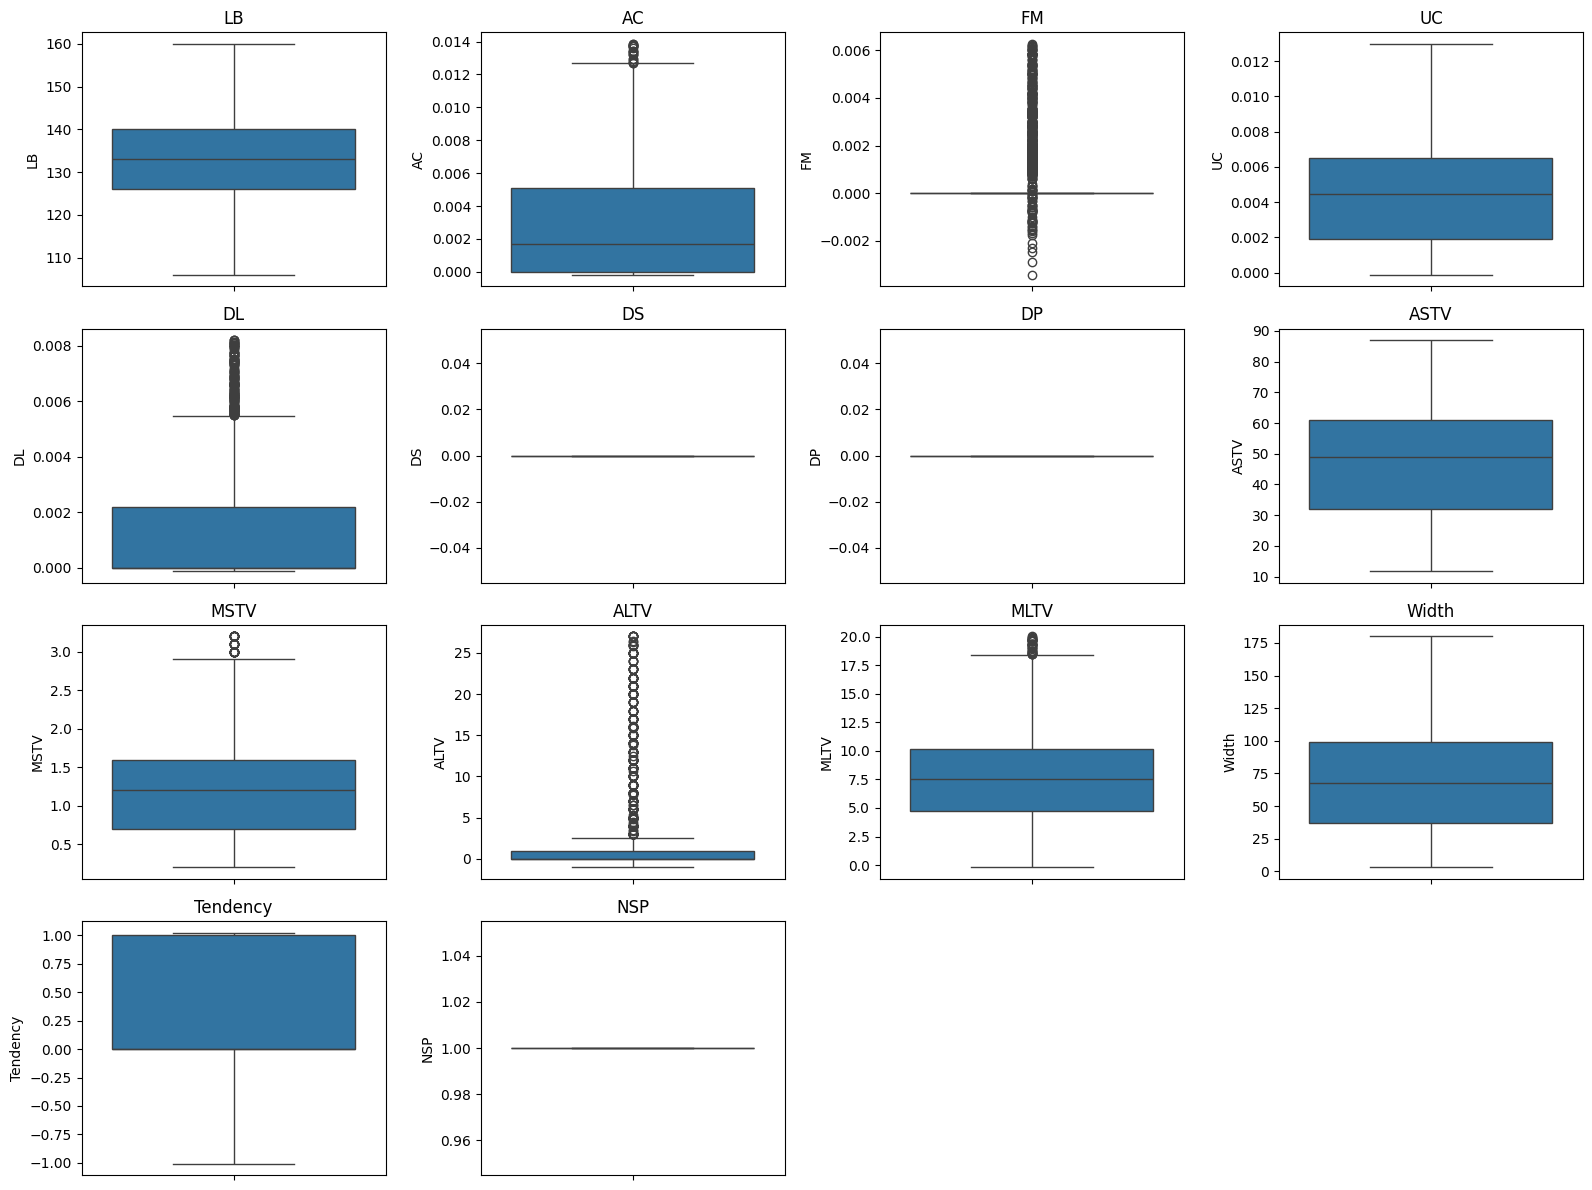

In [10]:
#Boxplots to visualize the distributions of variables.
plt.figure(figsize=(16, 12))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

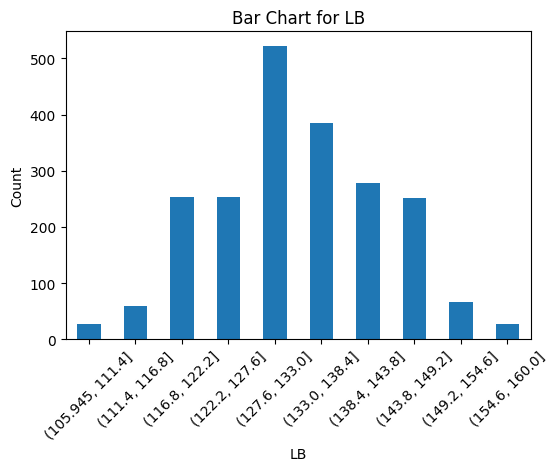

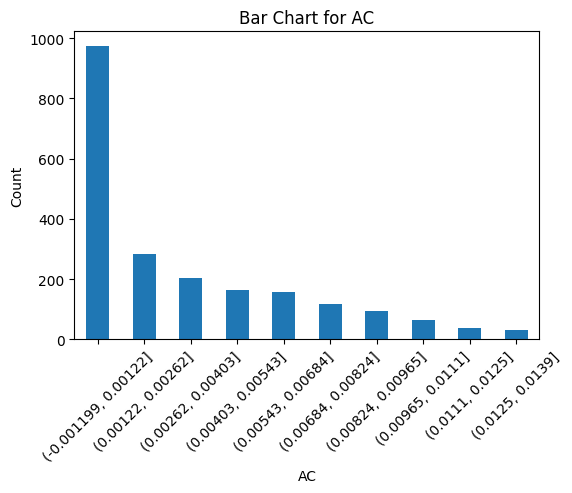

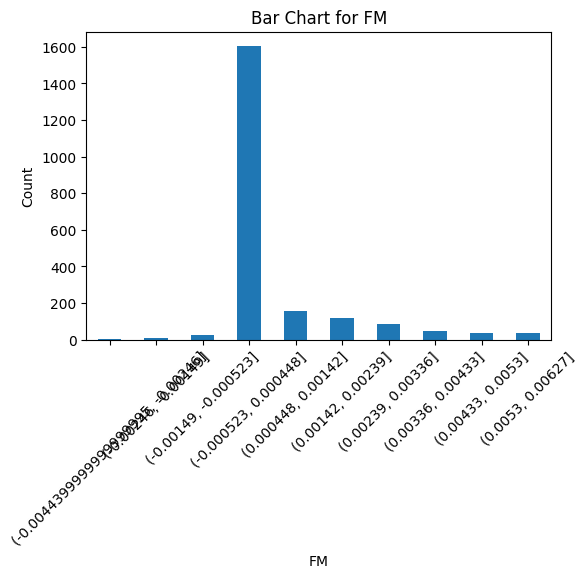

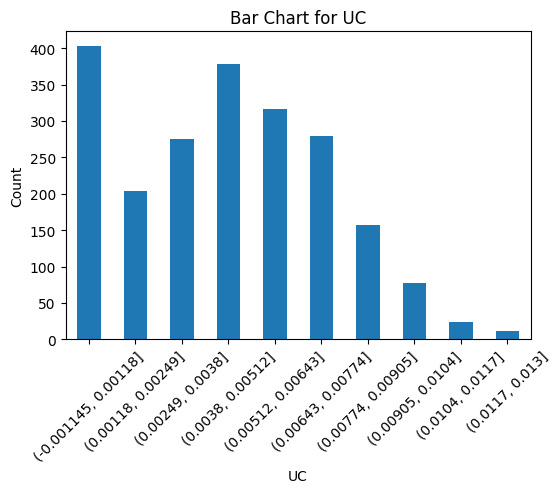

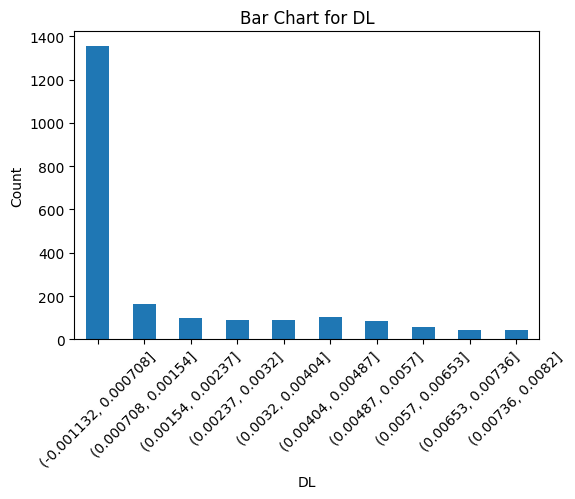

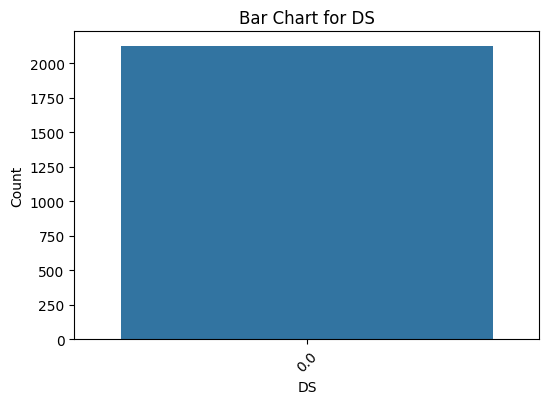

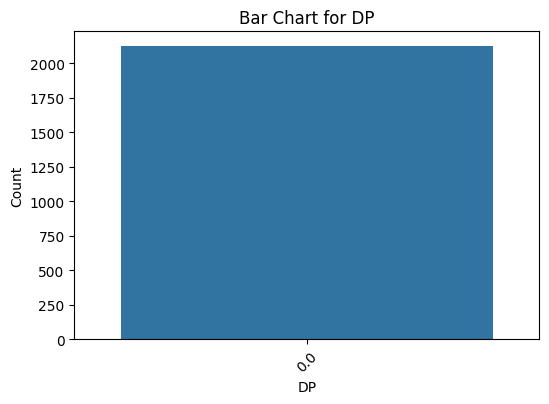

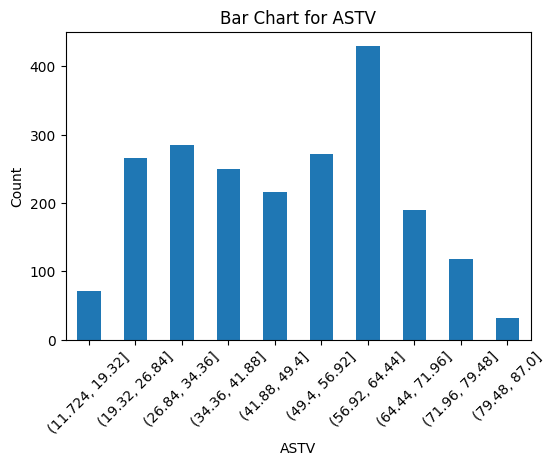

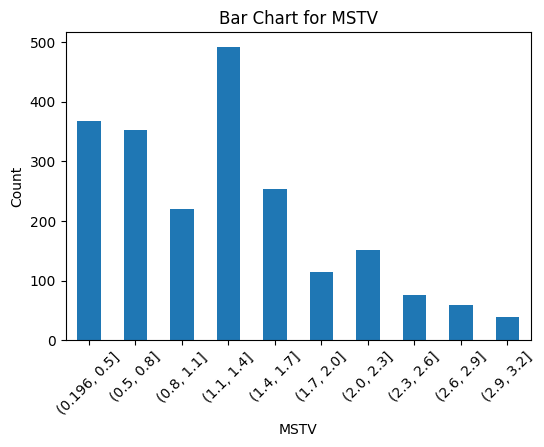

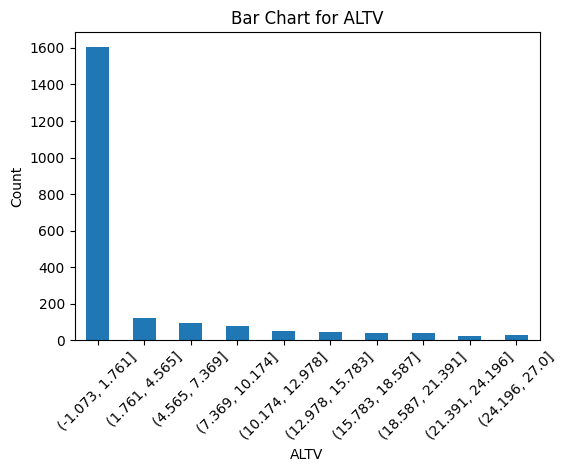

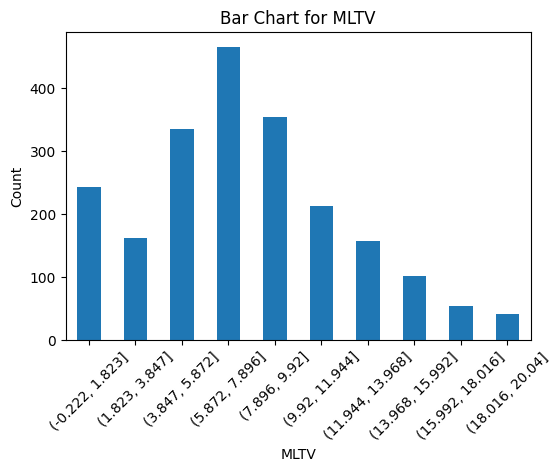

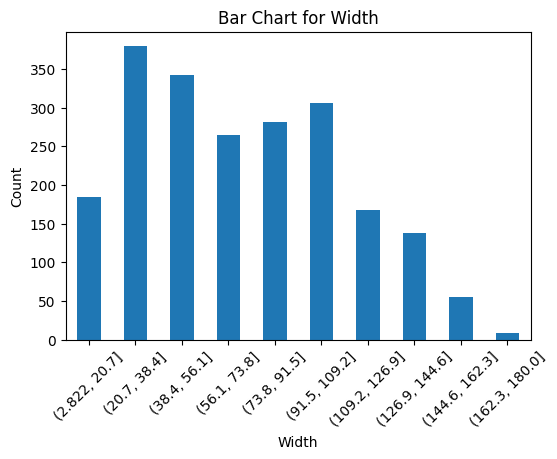

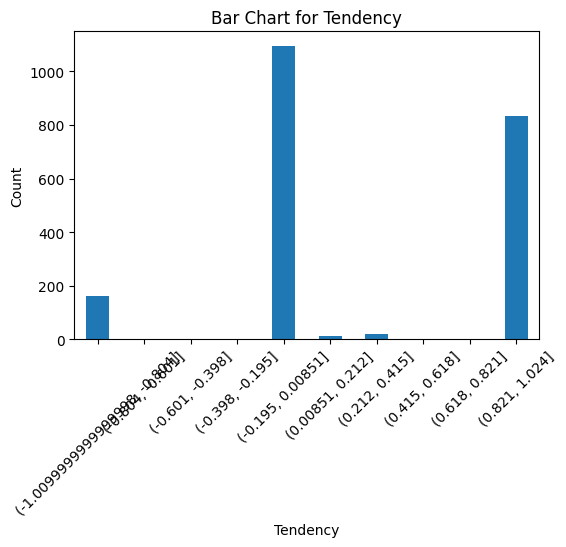

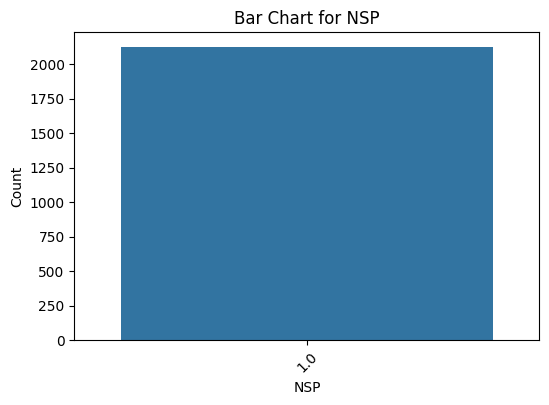

In [16]:
#Bar charts to display the categories for categorical variables.
for col in data.columns:
    plt.figure(figsize=(6,4))
    if data[col].nunique() <= 10:
        sns.countplot(x=col, data=data)
    else:
        data[col].value_counts(bins=10).sort_index().plot(kind='bar')
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

 pairwise scatter plots...


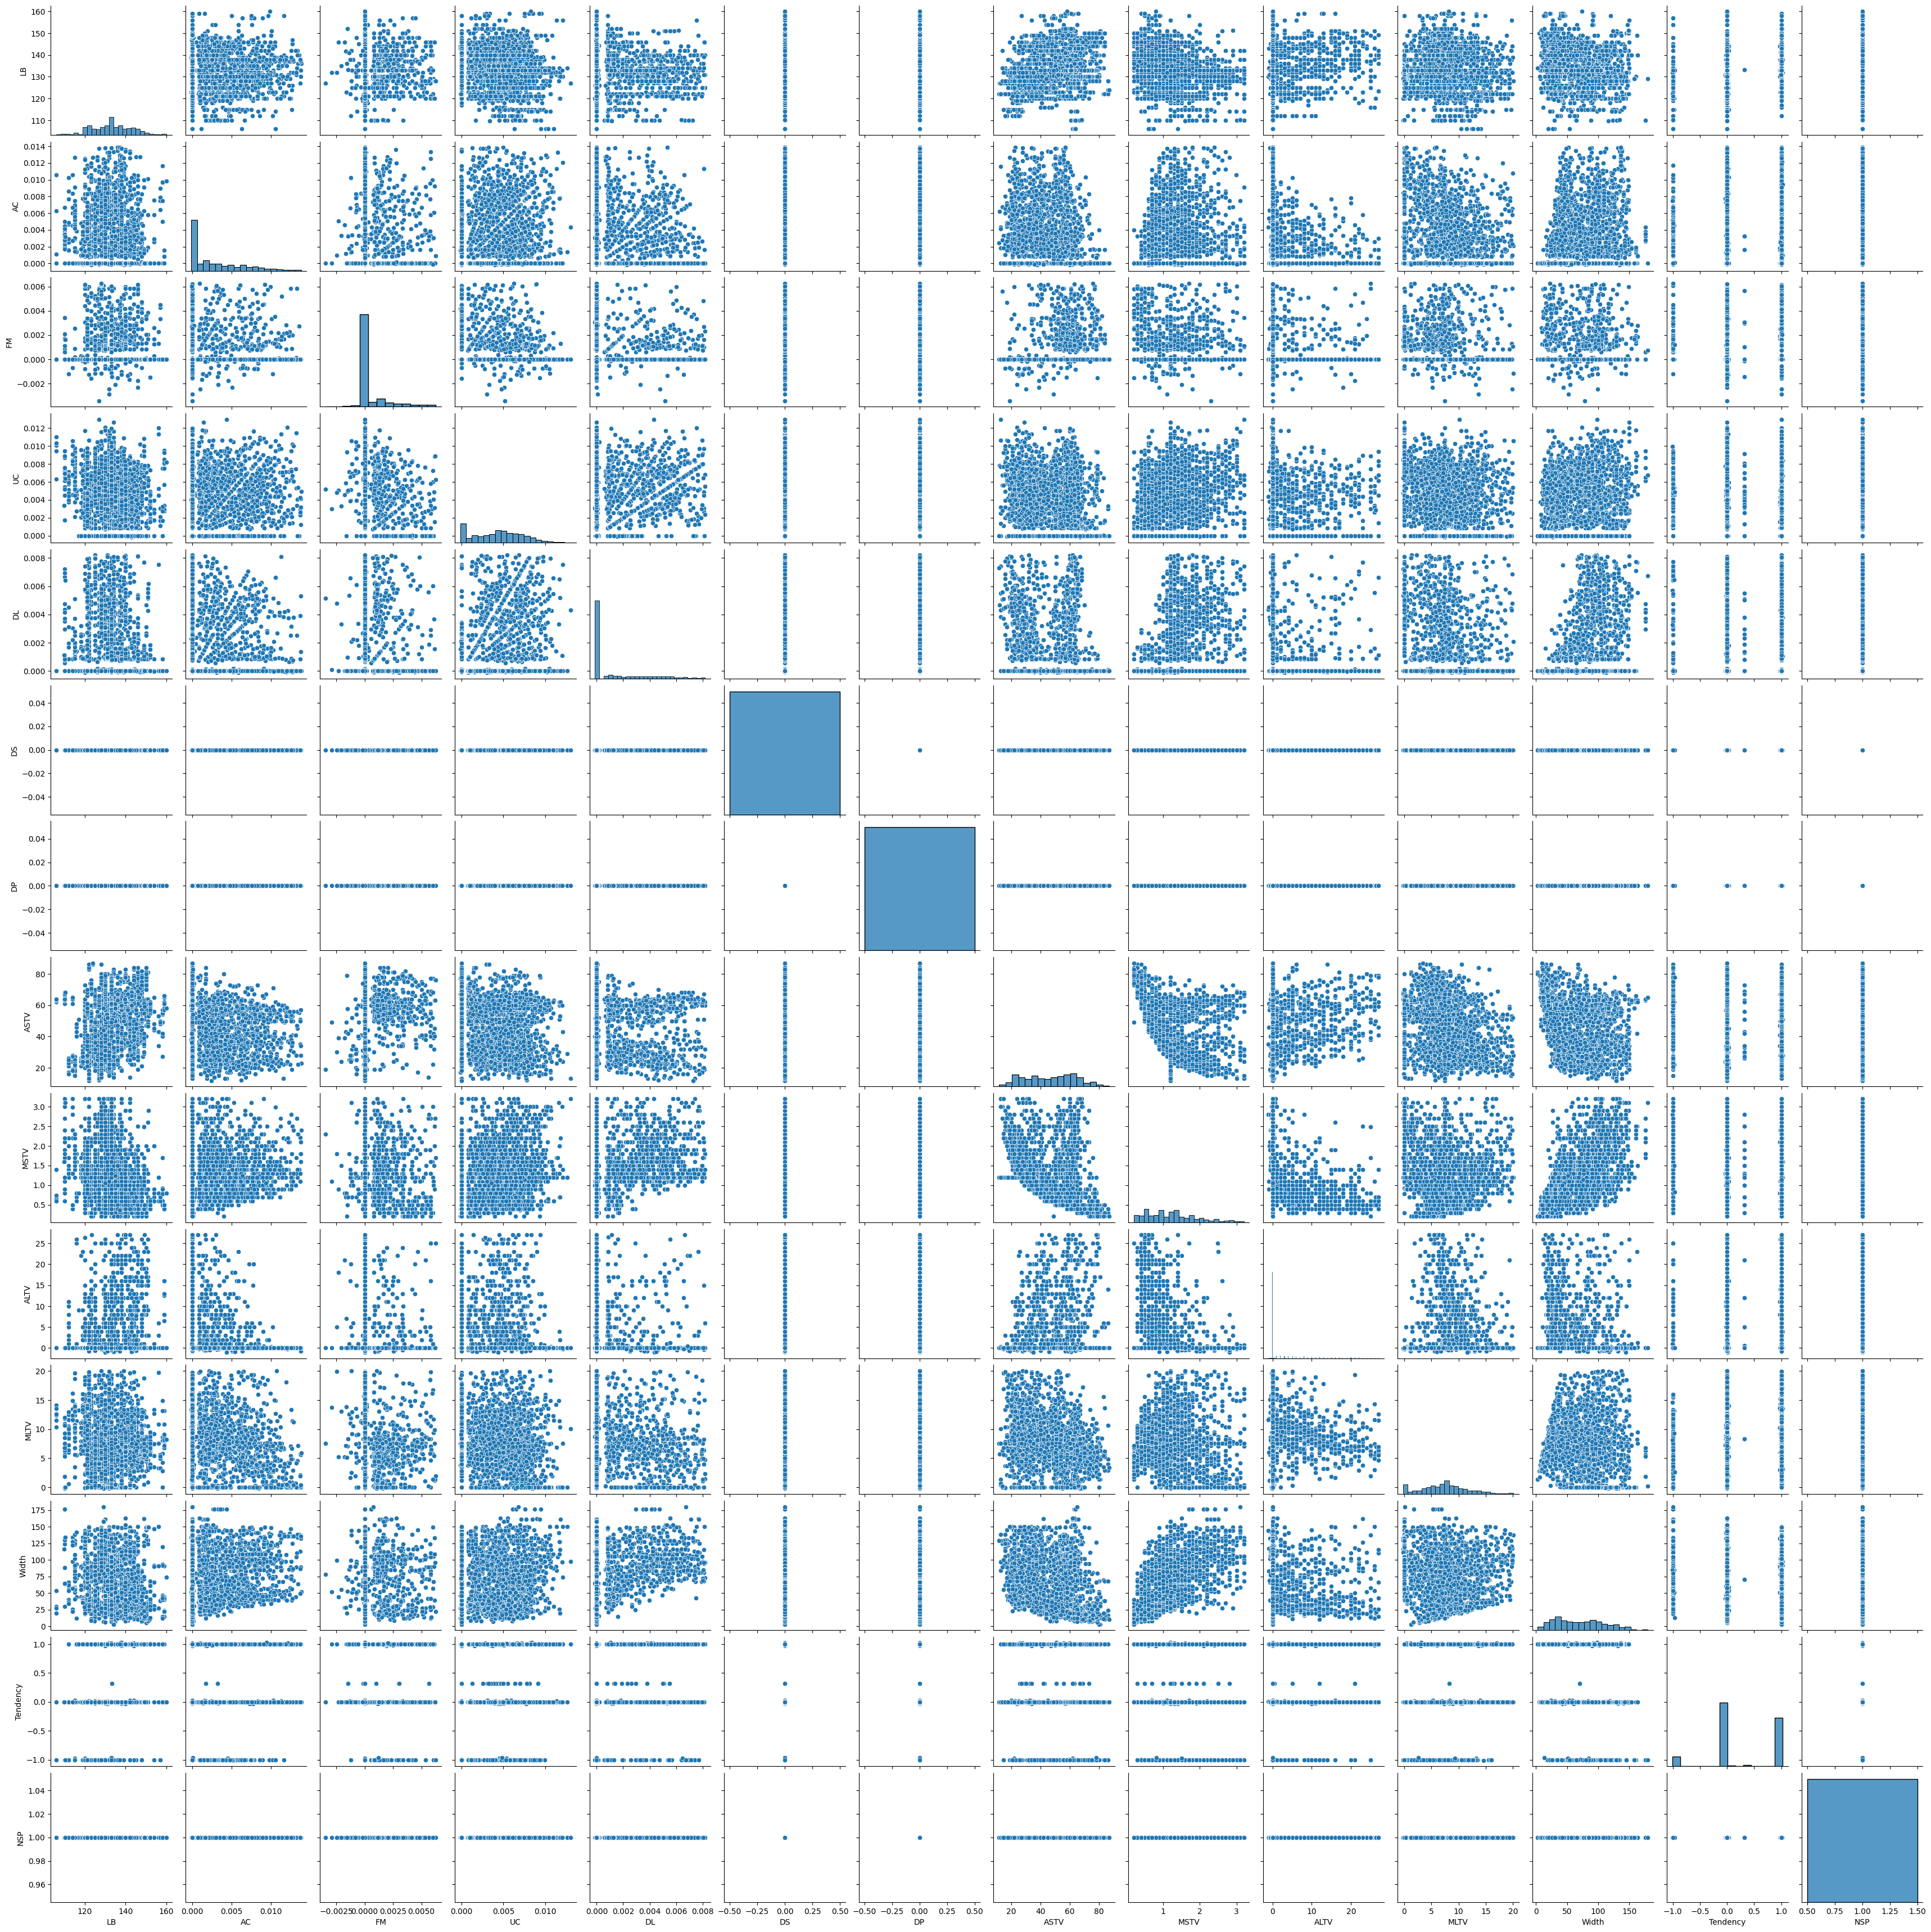

correlation heatmap...


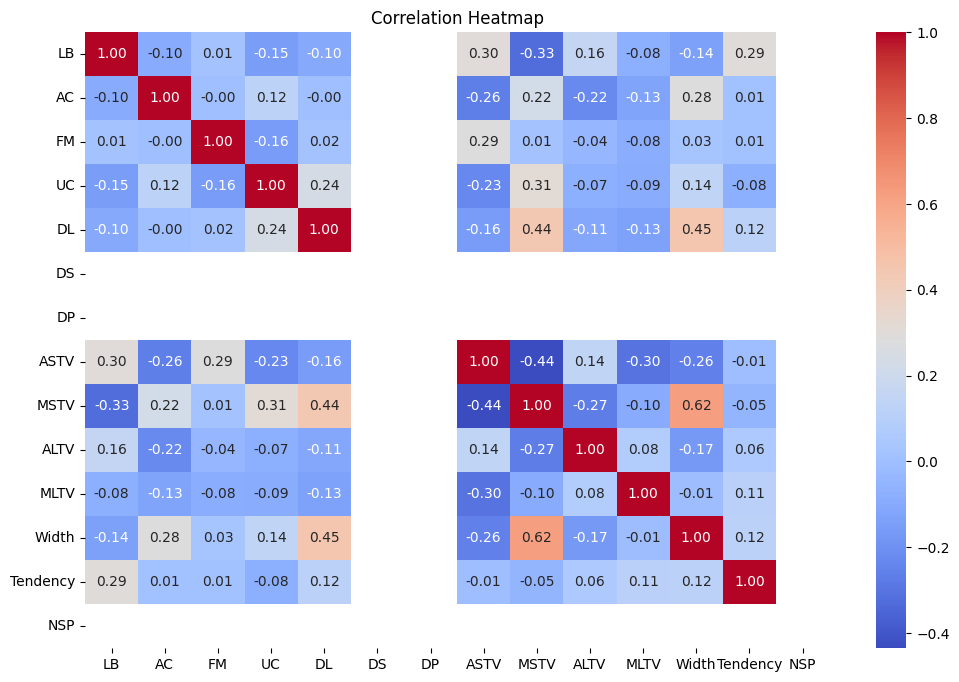

In [18]:
#Scatter plots to visualize relationships between pairs of variables.
print(" pairwise scatter plots...")
sns.pairplot(data)
plt.show()
print("correlation heatmap...")
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Pair plots...


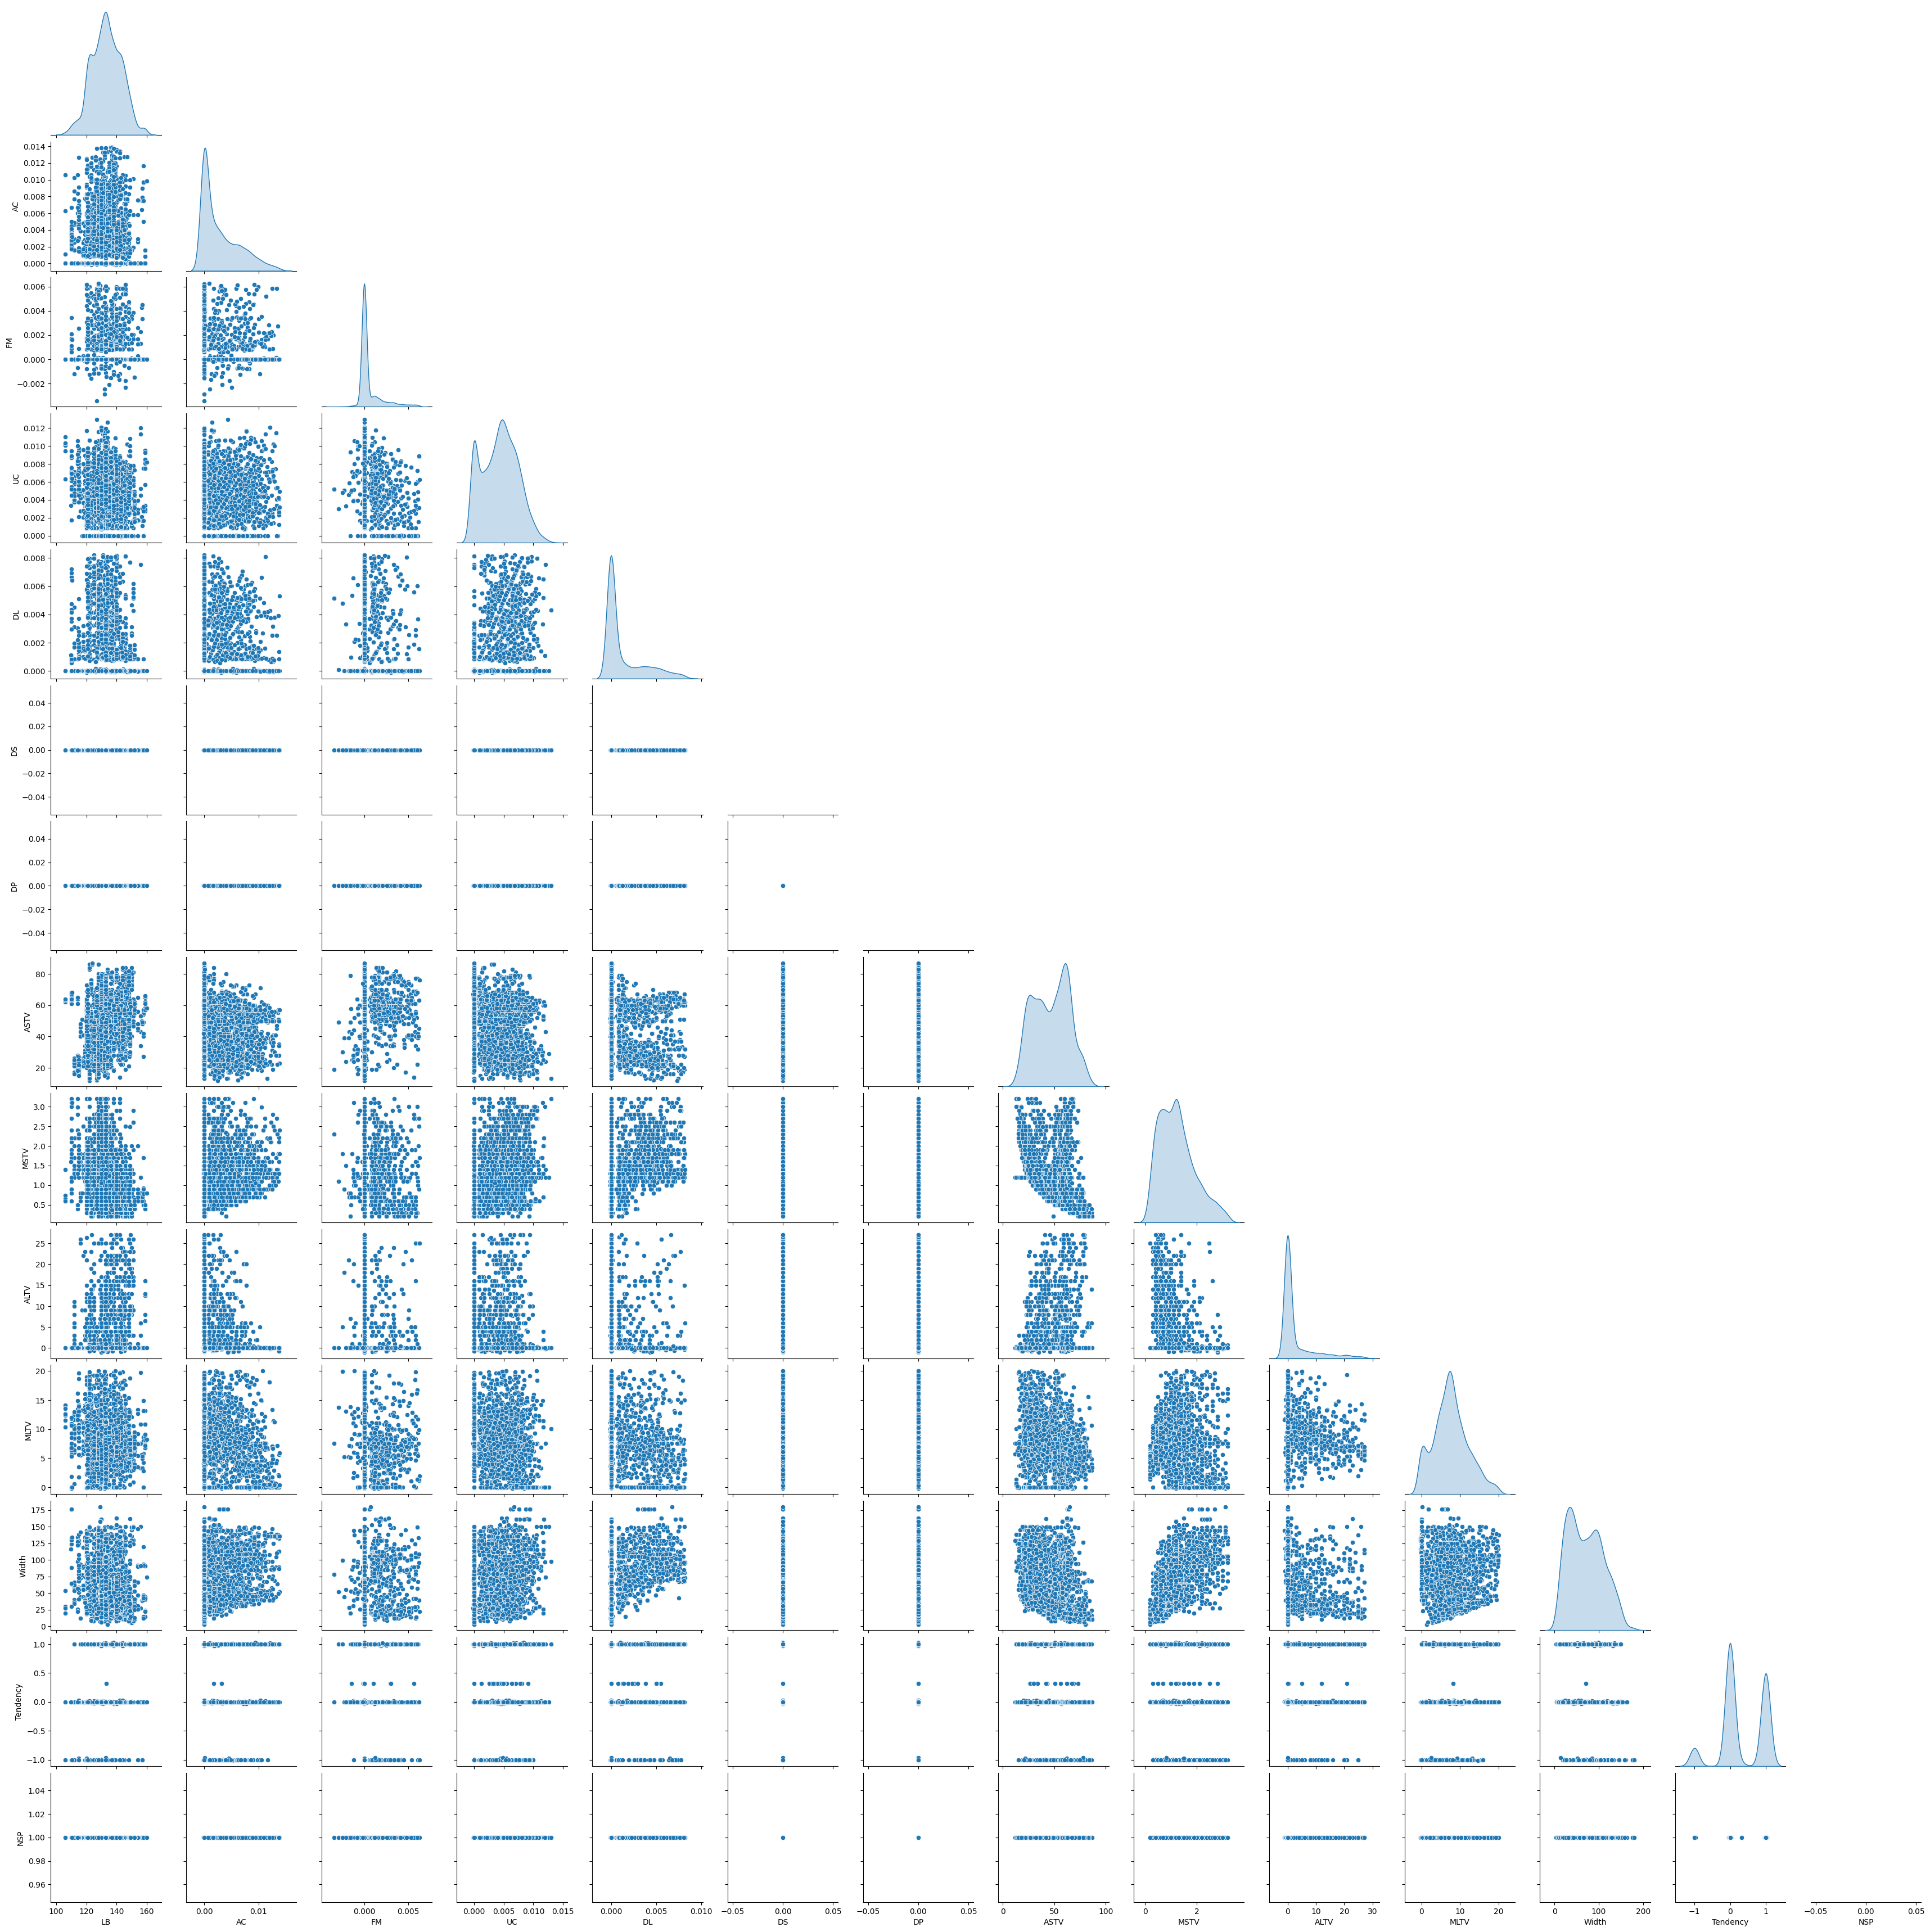

In [19]:
#pair plots for deeper insights
print("Pair plots...")
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

**4.Pattern Recognition and Insights:**

*  correlations between variables and their potential implications.
*  Trends or patterns over time if temporal data is available.  

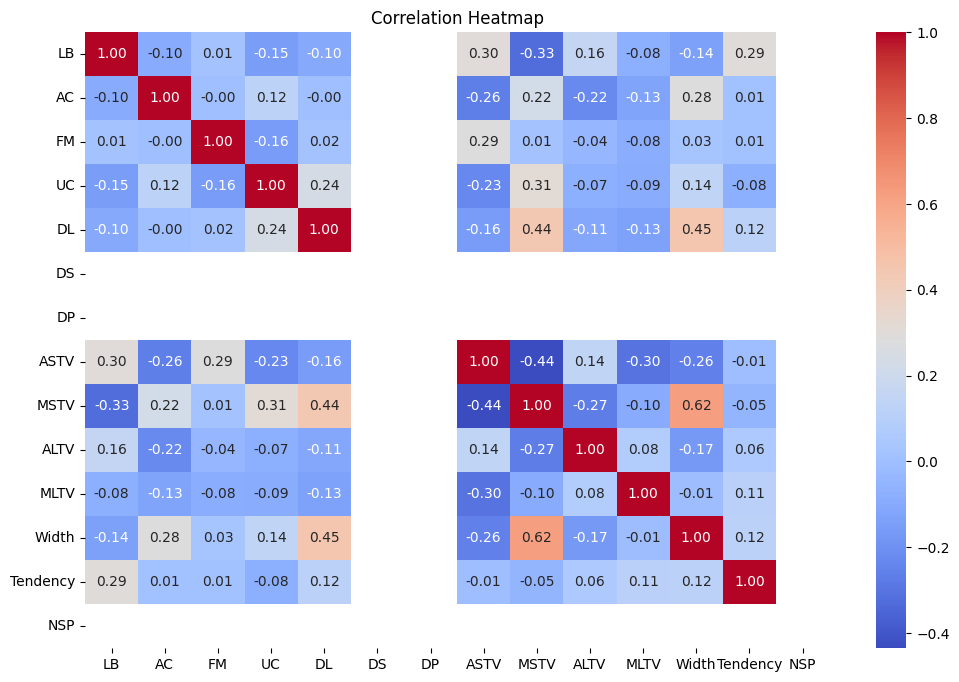

Correlation Matrix:


LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.096346  0.013441 -0.152439 -0.103847 NaN NaN  0.304294   
AC       -0.096346  1.000000 -0.001489  0.122033 -0.001978 NaN NaN -0.263576   
FM        0.013441 -0.001489  1.000000 -0.159789  0.017841 NaN NaN  0.287901   
UC       -0.152439  0.122033 -0.159789  1.000000  0.242874 NaN NaN -0.229723   
DL       -0.103847 -0.001978  0.017841  0.242874  1.000000 NaN NaN -0.158420   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.304294 -0.263576  0.287901 -0.229723 -0.158420 NaN NaN  1.000000   
MSTV     -0.327886  0.223380  0.013738  0.310587  0.440839 NaN NaN -0.435276   
ALTV      0.156087 -0.223462 -0.038340 -0.073111 -0.111059 NaN NaN  0.136740   
MLTV     -0.076792 -0.126775 -0.084318 -0.088602 -0.134709 NaN NaN -0.302430   
Width    -0.142807  0.282548  0.025466  0.138970  0.453959 NaN NaN -0.256037   
Tendency  0.293849  0.008000  0.009000 -0.077110  0.115487 NaN NaN -0.006388   
NSP            NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   

              MSTV      ALTV      MLTV     Width  Tendency  NSP  
LB       -0.327886  0.156087 -0.076792 -0.142807  0.293849  NaN  
AC        0.223380 -0.223462 -0.126775  0.282548  0.008000  NaN  
FM        0.013738 -0.038340 -0.084318  0.025466  0.009000  NaN  
UC        0.310587 -0.073111 -0.088602  0.138970 -0.077110  NaN  
DL        0.440839 -0.111059 -0.134709  0.453959  0.115487  NaN  
DS             NaN       NaN       NaN       NaN       NaN  NaN  
DP             NaN       NaN       NaN       NaN       NaN  NaN  
ASTV     -0.435276  0.136740 -0.302430 -0.256037 -0.006388  NaN  
MSTV      1.000000 -0.268885 -0.097640  0.618801 -0.049628  NaN  
ALTV     -0.268885  1.000000  0.078899 -0.166893  0.055813  NaN  
MLTV     -0.097640  0.078899  1.000000 -0.013726  0.110382  NaN  
Width     0.618801 -0.166893 -0.013726  1.000000  0.119592  NaN  
Tendency -0.049628  0.055813  0.110382  0.119592  1.000000  NaN  
NSP            NaN       NaN       NaN       NaN       NaN  NaN

In [21]:
#	correlations between variables and their potential implications.
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
print("Correlation Matrix:")
display(correlation_matrix)

Plotting trends over time for all key variables...


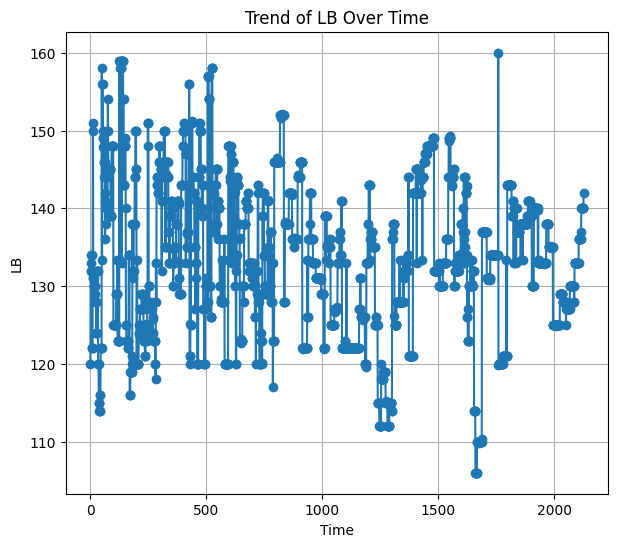

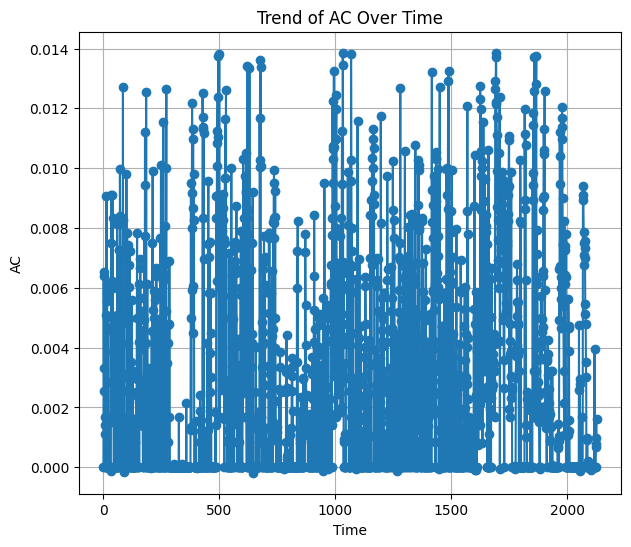

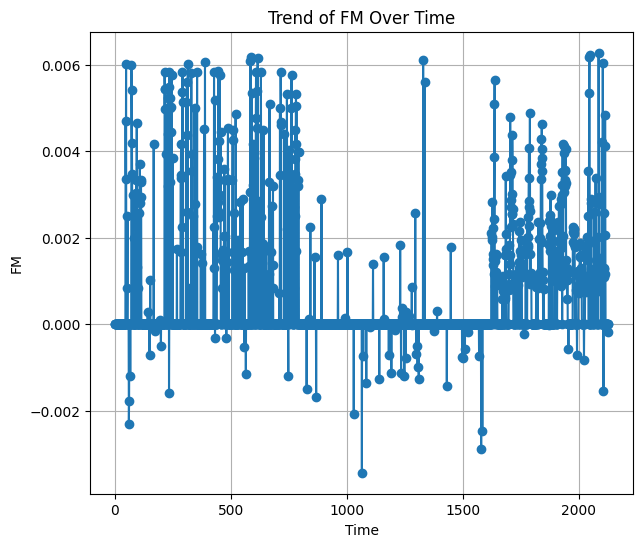

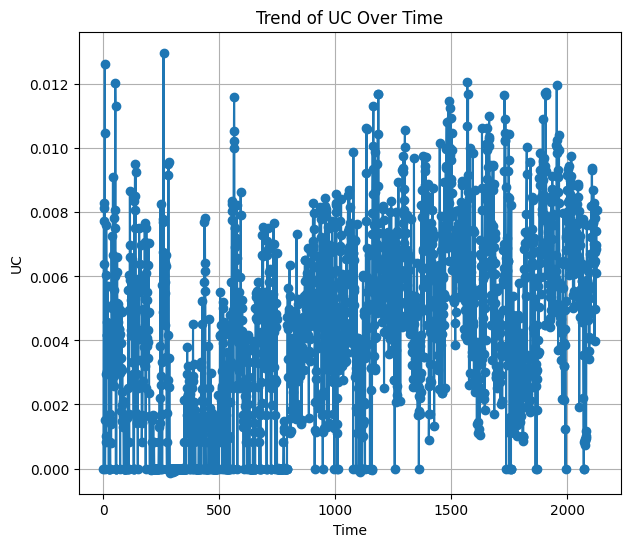

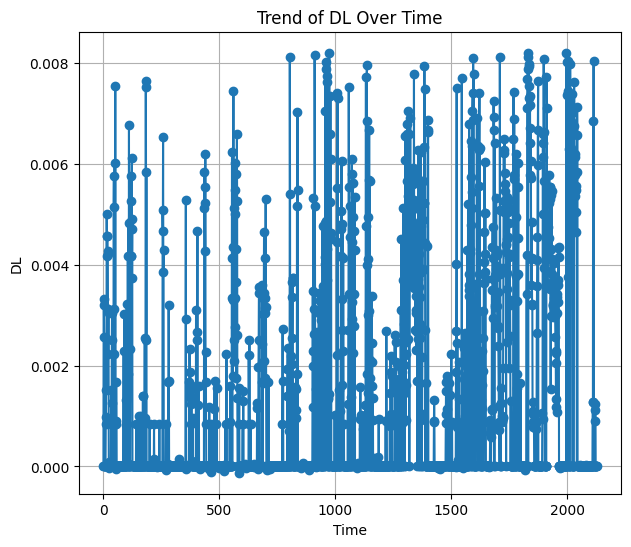

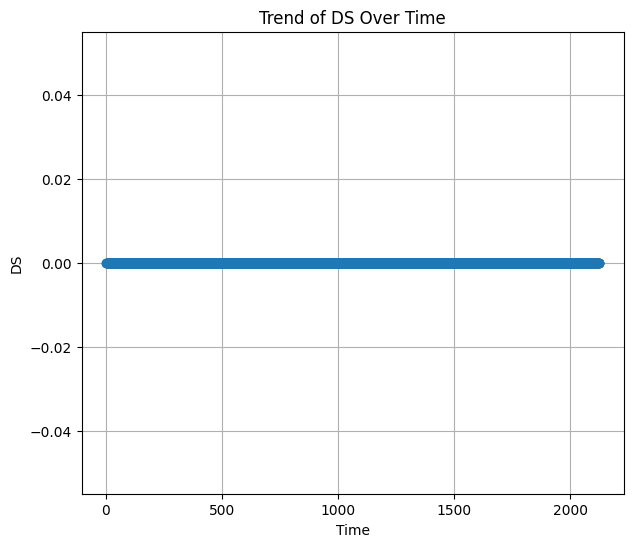

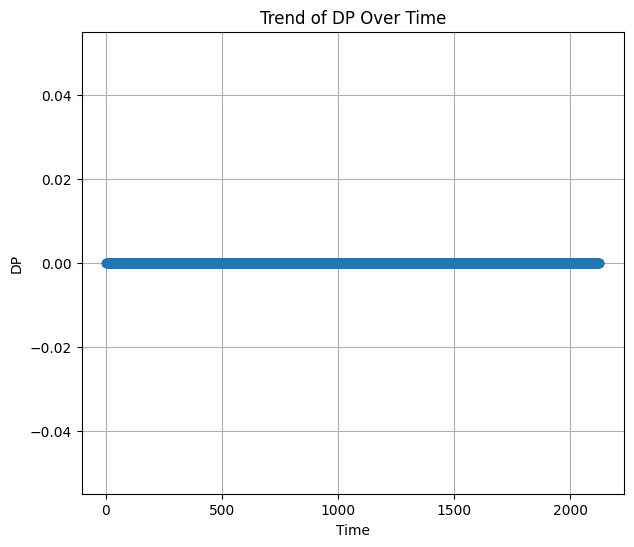

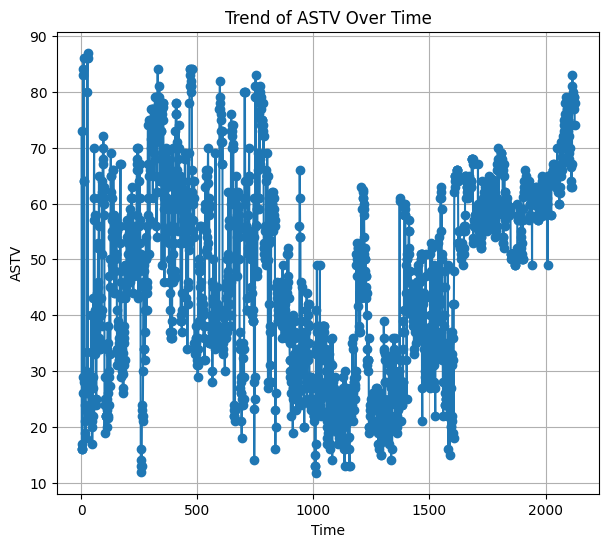

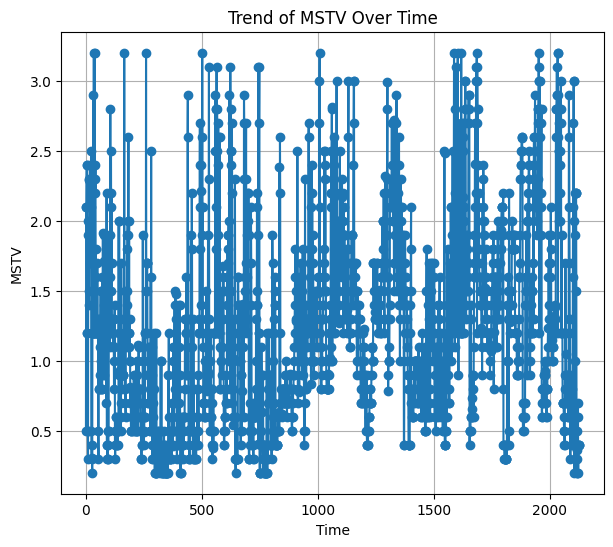

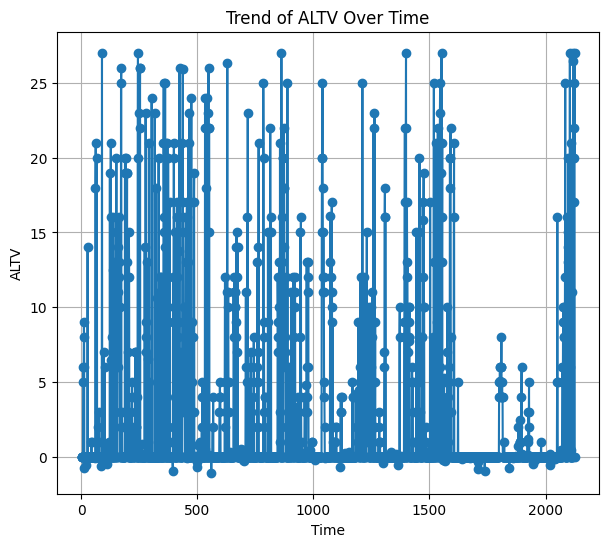

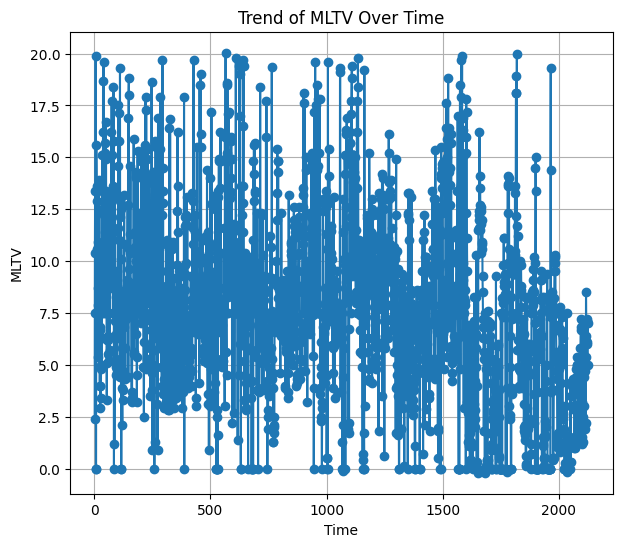

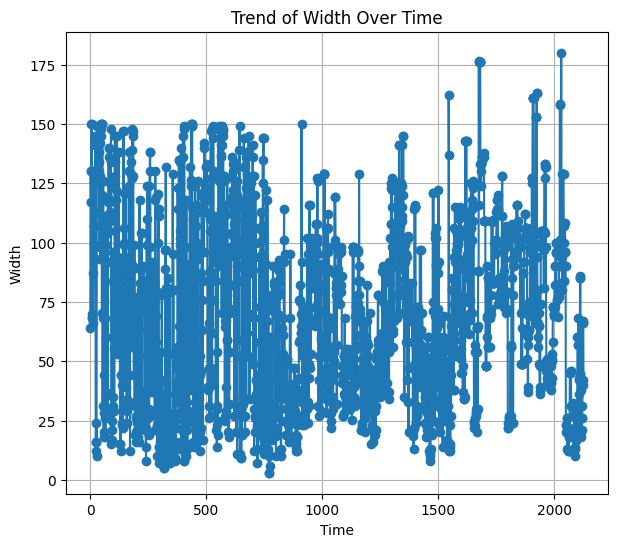

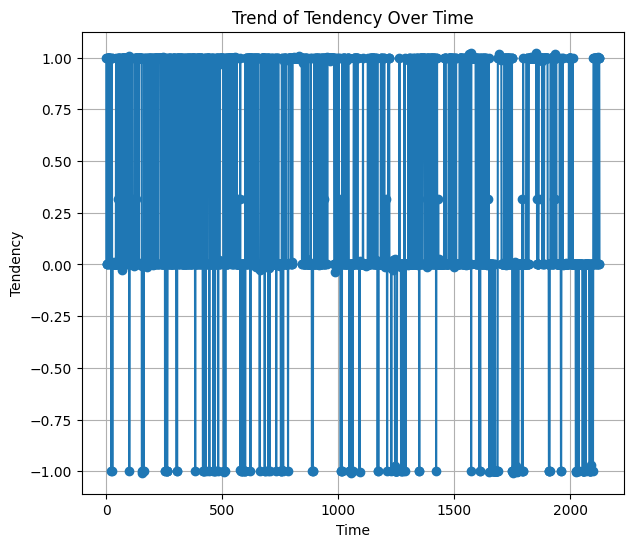

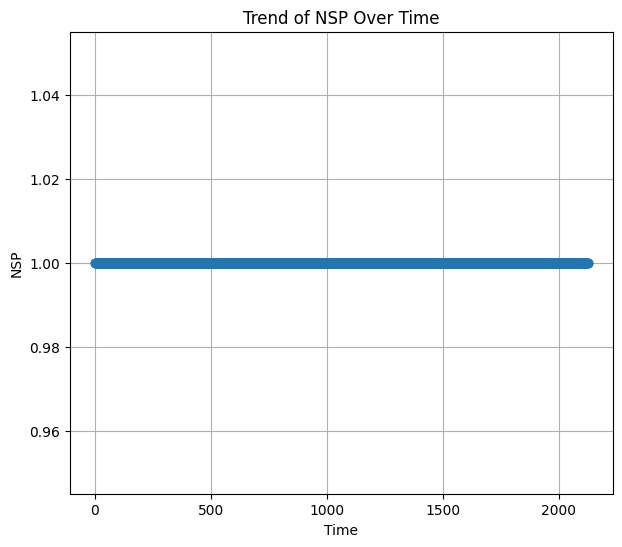

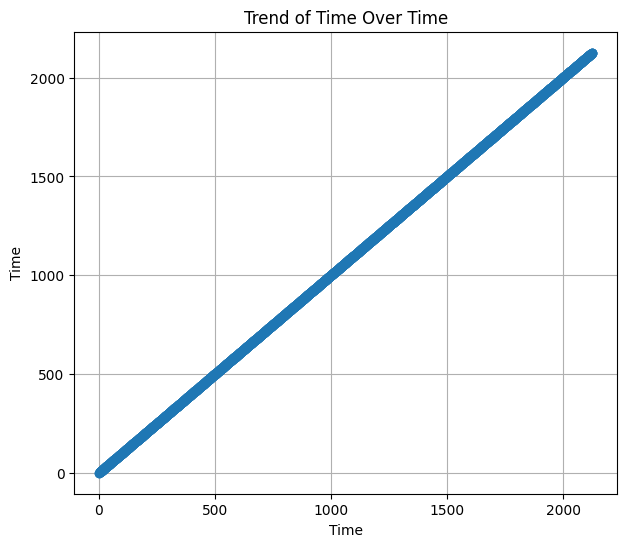

In [23]:
data['Time'] = range(1, len(data) + 1)
key_variables = data.select_dtypes(include=['float64', 'int64']).columns
print("Plotting trends over time for all key variables...")
for variable in key_variables:
    plt.figure(figsize=(7, 6))
    plt.plot(data['Time'], data[variable], marker='o', linestyle='-')
    plt.title(f'Trend of {variable} Over Time')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.grid(True)
    plt.show()

 **5.Conclusion**

 ●	**Summarize the key insights and patterns discovered through exploratory analysis.**

  A first analysis of the cardiotocographic data revealed a noteworthy association among a few parameters, potentially signifying redundancy. Regular fluctuations in certain variables were shown by temporal trends, indicating cyclical patterns or ongoing processes such as labor contractions. The data was not uniform; some variables had normal distributions, while others showed skewness, which might be a sign of anomalies or out-of-the-ordinary behavior.


  ●***How these findings could impact decision-making or further analyses.***

   These findings may significantly impact decision-making and further analyses:

**Feature Selection:** Strong correlations imply the possibility of some variables being redundant. By recognizing these and maybe eliminating them, we can streamline models and enhance their readability and effectiveness.


**Predictive Modeling:** Better predictive modeling is made possible by an understanding of temporal trends, particularly when some variables exhibit consistent time-varying behavior. In clinical contexts, identifying these trends can result in more precise forecasts or early warnings.


**Outlier Management:** Outliers and skewed distributions suggest that managing data must be done carefully. It is essential to deal with these outliers in order to create reliable models and steer clear of false conclusions.
